<a href="https://colab.research.google.com/github/00kang/gis_deep_learning/blob/main/July/07_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **단순 신경망**

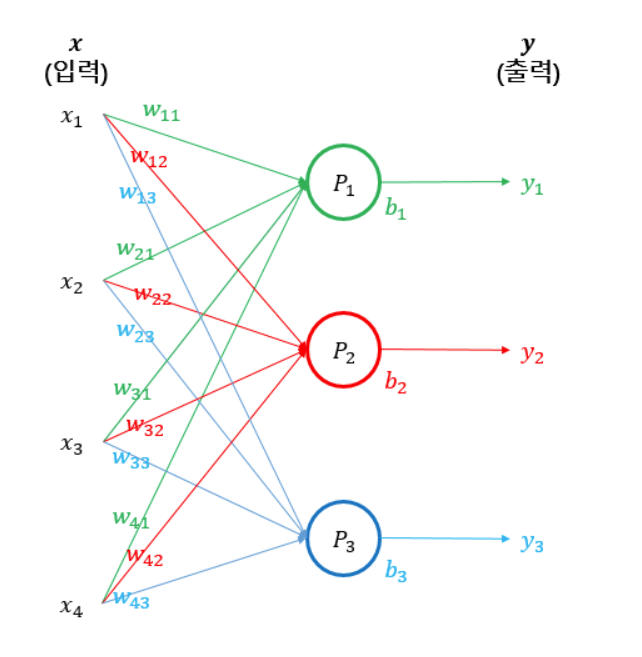

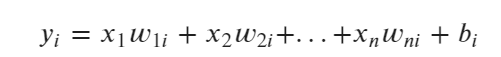

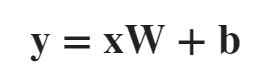

# **Faults Dataset 적용**

**데이터 불러오기**

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/faults.csv')

**데이터 확인**    
총 33개의 데이터 중, 0-26: 독립변수, 27-33: 종속변수

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [4]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**데이터셋 생성 및 확인**

In [5]:
df_dataset = df[['X_Minimum','X_Maximum','Steel_Plate_Thickness','LogOfAreas',
                 'Pastry','Z_Scratch','Bumps']]

print("df_dataset.shape : ", df_dataset.shape)
print(df_dataset.info())

df_dataset.shape :  (1941, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Steel_Plate_Thickness  1941 non-null   int64  
 3   LogOfAreas             1941 non-null   float64
 4   Pastry                 1941 non-null   int64  
 5   Z_Scratch              1941 non-null   int64  
 6   Bumps                  1941 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 106.3 KB
None


**데이터셋의 데이터 형식 변경**

In [9]:
df_dataset = np.asarray(df_dataset, dtype='float32')
df_dataset

array([[4.200e+01, 5.000e+01, 8.000e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [6.450e+02, 6.510e+02, 8.000e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.290e+02, 8.350e+02, 1.000e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.450e+02, 1.740e+02, 4.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.370e+02, 1.700e+02, 4.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.261e+03, 1.281e+03, 8.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

**x, y 데이터셋 생성**     
총 7개의 데이터 중, 4개는 입력변수, 3개는 출력변수

In [10]:
df_dataset_x = df_dataset[0:1, :-3] #맨 앞 네개
df_dataset_y = df_dataset[0:1, -3:]

print("df_dataset_x : ", df_dataset_x)
print("df_dataset_x.shape : ", df_dataset_x.shape)
print("df_dataset_y : ", df_dataset_y)
print("df_dataset_y.shape : ", df_dataset_y.shape)

df_dataset_x :  [[42.     50.     80.      2.4265]]
df_dataset_x.shape :  (1, 4)
df_dataset_y :  [[1. 0. 0.]]
df_dataset_y.shape :  (1, 3)


**weight(가중치), bias(편향) 생성**

In [11]:
RND_STD = 1
RND_MEAN = 0

input_cnt = df_dataset_x.shape[-1]  #4
output_cnt = df_dataset_y.shape[-1] #3

#0~1사이의 값으로 12개의 가중치 추출
weight = np.random.normal(RND_MEAN, RND_STD, size=[input_cnt, output_cnt])
#0~1사이의 값으로 3개의 편향 추출
bias = np.random.normal(RND_MEAN, RND_STD, size=[output_cnt])

In [12]:
print('weight.shape: ', weight.shape)
print('bias.shape: ', bias.shape)

weight.shape:  (4, 3)
bias.shape:  (3,)


**계산에 쓰일 x, w, b 값 확인**

In [13]:
print('df_dataset_x: \n', df_dataset_x)
print('weight: \n', weight)
print('bias: \n', bias)

df_dataset_x: 
 [[42.     50.     80.      2.4265]]
weight: 
 [[ 0.16366593  1.11225509  0.68177503]
 [ 1.47027708 -0.30529768 -0.32681299]
 [-0.71502828 -2.93651007  0.75758544]
 [ 0.42338008  1.20525433 -0.55105662]]
bias: 
 [-1.84563071 -0.5695511   0.06228818]


**값 예측 연산**       
np.matmul: 행렬곱

In [14]:
P_1 = np.matmul(df_dataset_x[0], weight[:,0] + bias[0])
P_2 = np.matmul(df_dataset_x[0], weight[:,1] + bias[1])
P_3 = np.matmul(df_dataset_x[0], weight[:,2] + bias[2])

P_total = np.matmul(df_dataset_x, weight) + bias

In [16]:
print(P_1)
print(P_2)
print(P_3)
print("-"*50)
print(P_total)

-297.7140121169196
-299.89123053325727
82.42830662860936
--------------------------------------------------
[[  22.36726206 -201.1159769    71.62588593]]
